<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/01_neural_ntewrok_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NN in Tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating  a data to view and fit 

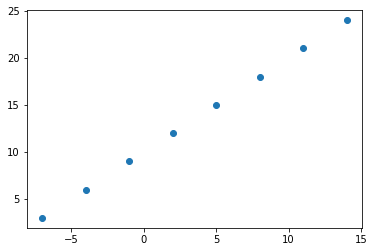

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features

X = np.array([-7.,-4.0,-1,2.0,5.0,8,11,14.0])
X
#Create labels
y = np.array([3,6,9.0,12,15.0,18,21,24])
plt.scatter(X,y)

In [ ]:
y ==X+10


array([ True,  True,  True,  True,  True,  True,  True,  True])

** Input and output shapes

In [ ]:
##create a demo tensor for out housing price prediction problme
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
# trun numpyt array tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

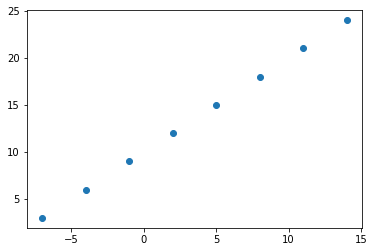

In [ ]:
plt.scatter(X,y)

#Steps in modelling with Tensor flow

In [ ]:
#set random seed
tf.random.set_seed(42)

# Create a model using the Sequential
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])

# Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

#fit the model
model.fit(X,y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 540ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

#improving the model

In [ ]:
#lets rebuild out model
# 1. Create amodel
model_imporve = tf.keras.Sequential([
                                     tf.keras.layers.Dense(50,activation=None),
                                     tf.keras.layers.Dense(1)
                                     ])
# 2. Comiple the model
model_imporve.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      metrics=['mae'])
#3. Fit the model
model_imporve.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 353ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2603 - mae: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5659 - mae: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8675 - mae: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 5ms/ste

In [ ]:
model_imporve.predict([17.0])

array([[26.434414]], dtype=float32)

Evaluating a model

1. Creating more data 

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

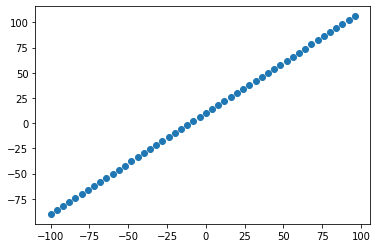

In [ ]:
# visualize the data 
import matplotlib.pyplot as plt
plt.scatter(X,y)

#split the data in Training and  Testing format.
* Training data is usually 80% of data
* Testing data is usually 20% of data for testing the model 


In [ ]:
X_train = X[:40]
X_test = X[40:]

y_train =y[:40]
y_test =y[40:]


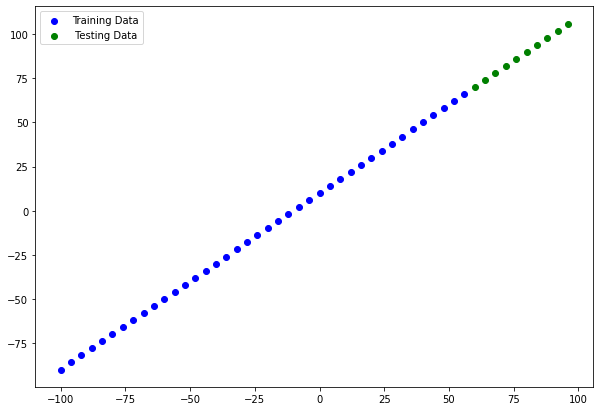

In [ ]:
#visualize the training and test data

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b", label="Training Data")
plt.scatter(X_test,y_test,c="g", label =" Testing Data")
plt.legend()

In [ ]:
# 1. Create a model

model_huge = tf.keras.Sequential([
                                  tf.keras.layers.Dense(10,name="input_layer"),
                                  tf.keras.layers.Dense(1,name="output_layer"),
                                
],name="huge_model")

#2. Compile the model
model_huge.compile(loss=tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics=["mae"]
)

#3. Fit the model

model_huge.fit(X_train,y_train, epochs =100, verbose=0)
model_huge.summary()

Model: "huge_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


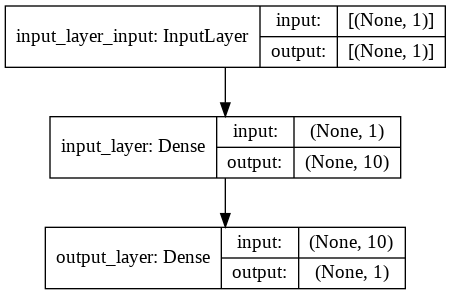

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_huge, show_shapes=True)